<a href="https://colab.research.google.com/github/renukagore107/CAPSTONE-PROJECT-3--CLASSIFICATION/blob/main/classification_data_email.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predicting the effectiveness of email campaign by marketing agencies using different ML classification models. Most of the small to medium business owners are making effective use of Gmail-based Email marketing Strategies for offline targeting of converting their prospective customers into leads so that they stay with them in business. The main objective is to create a machine learning model to characterize the mail and track the mail that is ignored; read; acknowledged by the reader. Data columns are self-explanatory.

The data has the following features:

Email_ID - This column contains the email ids of individuals.

Email_type - Email type contains 2 categories 1 and 2. We can assume that the types are like promotional email or sales email.

Subject_Hotness_Score - It is the subject-line effectiveness score.

Email_Source - It represents the source of the email like sales,marketing or product type email.

Email_Campaign_Type - Campaign type

Total_Past_Communications - This column contains the previous mails from the source.

Customer_Location - Categorical data which explains the different demographic location of the customers.

Time_Email_sent_Category - It has 3 categories: 1,2 and 3 which are considered as morning,evening and night time slot.

Word_Count - It contains the no.of words in the mail.

Total_Links - Total links in the email body.

Total_Images - The banner images in the email body.

Email_Status - It is the target variable which contains the characterization of the mail that is ignored; read; acknowledged by the reader.



The main objective is to create a machine learning model to characterize the mail and track the mail that is ignored; read; acknowledged by the reader.

In addition to the ML Model prediction, we also analyzed what all features can help us in getting the Email status to be not ignored by the customers.

In [1]:
#Importing important libraries and modules
#for data reading and manipulation
import pandas as pd
import numpy as np

#for data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})

#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Modelling
#Train-Test Split
from sklearn.model_selection import train_test_split
#Grid Search for Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

#Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, roc_auc_score, f1_score, recall_score,roc_curve, classification_report

#to ignore warnings
import warnings    
warnings.filterwarnings('ignore')


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
email_df=pd.read_csv('/content/drive/MyDrive/email project/data_email_campaign.csv')

In [4]:
email_df.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


In [5]:
email_df.tail()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
68348,EMA00089995974500,2,0.4,1,F,2,22.0,3,737,16.0,13.0,0
68349,EMA00089998225300,1,1.3,1,C,2,40.0,2,653,31.0,16.0,0
68350,EMA00089998436500,1,2.2,2,NaN,2,33.0,2,490,9.0,0.0,0
68351,EMA00089999168800,1,0.4,1,E,2,50.0,1,733,14.0,4.0,0
68352,EMA00089999316900,1,1.5,1,G,2,20.0,2,1038,6.0,0.0,0


In [6]:
email_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


In [7]:
email_df.shape

(68353, 12)

In [8]:
email_df.describe(include='all')

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
count,68353,68353.000000,68353.000000,68353.000000,56758,68353.000000,61528.000000,68353.000000,68353.000000,66152.000000,66676.000000,68353.000000
unique,68353,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,EMA00081000034500,NaN,NaN,NaN,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,23173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.285094,1.095481,1.456513,NaN,2.272234,28.933250,1.999298,699.931751,10.429526,3.550678,0.230934
std,NaN,0.451462,0.997578,0.498109,NaN,0.468680,12.536518,0.631103,271.719440,6.383270,5.596983,0.497032
min,NaN,1.000000,0.000000,1.000000,NaN,1.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000
25%,NaN,1.000000,0.200000,1.000000,NaN,2.000000,20.000000,2.000000,521.000000,6.000000,0.000000,0.000000
50%,NaN,1.000000,0.800000,1.000000,NaN,2.000000,28.000000,2.000000,694.000000,9.000000,0.000000,0.000000
75%,NaN,2.000000,1.800000,2.000000,NaN,3.000000,38.000000,2.000000,880.000000,14.000000,5.000000,0.000000


In [9]:
#Check for any duplicates data
email_df.duplicated().sum()
     

0

In [10]:
#check for null values
email_df.isnull()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
68348,False,False,False,False,False,False,False,False,False,False,False,False
68349,False,False,False,False,False,False,False,False,False,False,False,False
68350,False,False,False,False,True,False,False,False,False,False,False,False
68351,False,False,False,False,False,False,False,False,False,False,False,False


Data Cleaning and PreProcessing:
When we have raw data, it may contain missing values, NaN values or absurd values. It is necessary to check and handle these values before feeding it to the models, so as to obtain good insights on what the data is trying to say and make great characterisation and prediction which will in turn help improve the business's content.

In [11]:
#get the num of nulls in each column
email_df.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

Text(0.5, 1.0, 'Distributin of Total Images')

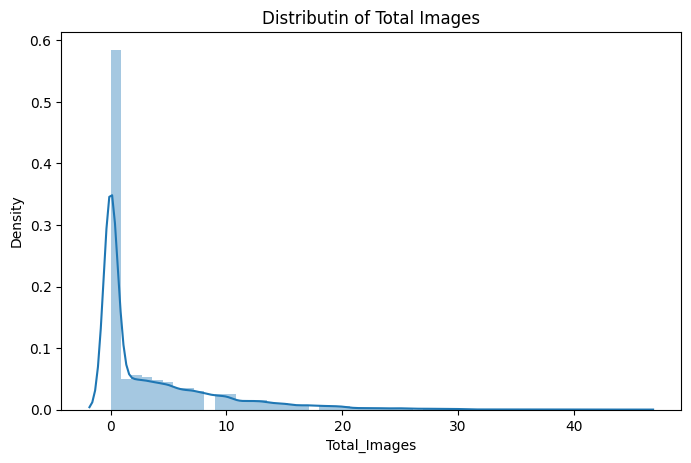

In [12]:
#let's see the distribution plot of total images
sns.distplot(email_df.Total_Images.dropna())
plt.title("Distributin of Total Images")

In [13]:
#Filling missing values of Total_images column
print('Number of missing values before imputing is = ',email_df['Total_Images'].isnull().sum())
email_df['Total_Images'].fillna(email_df['Total_Images'].mode()[0],inplace=True)
print('Number of missing values after imputing is = ',email_df['Total_Images'].isnull().sum())
     

Number of missing values before imputing is =  1677
Number of missing values after imputing is =  0


Text(0.5, 1.0, 'Distributin of Total_Past_Communications ')

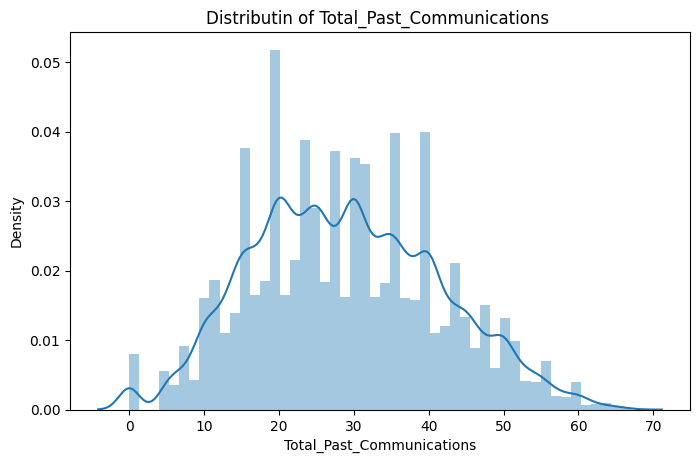

In [14]:
#let's see the distribution plot of past communication
sns.distplot(email_df.Total_Past_Communications .dropna())
plt.title("Distributin of Total_Past_Communications ")

In [15]:
print('Number of missing values before imputing is = ',email_df['Total_Past_Communications'].isnull().sum())
email_df['Total_Past_Communications'].fillna(email_df['Total_Past_Communications'].mean(),inplace=True)
print('Number of missing values after imputing is = ',email_df['Total_Past_Communications'].isnull().sum())

Number of missing values before imputing is =  6825
Number of missing values after imputing is =  0


Text(0.5, 1.0, 'Distributin of Total_Links  ')

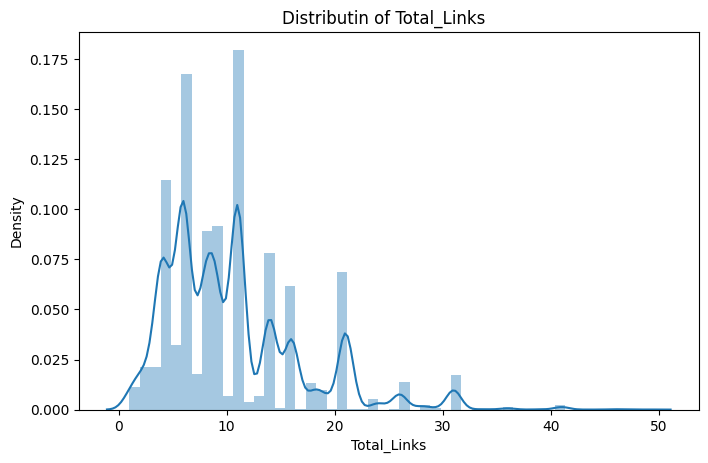

In [16]:
#let's see the distribution plot of total_links
sns.distplot(email_df.Total_Links .dropna())
plt.title("Distributin of Total_Links  ")

In [17]:
#Filling missing values of Total_Links column
print('Number of missing values before imputing is = ',email_df['Total_Links'].isnull().sum())
email_df['Total_Links'].fillna(email_df['Total_Links'].mode()[0],inplace=True)
print('Number of missing values after imputing is = ',email_df['Total_Links'].isnull().sum())
     

Number of missing values before imputing is =  2201
Number of missing values after imputing is =  0


In [18]:
email_df.isna().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications        0
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                      0
Total_Images                     0
Email_Status                     0
dtype: int64

still now location column has null value. we will impute it in next part

In [19]:
#check for duplicates
email_df.duplicated().sum()
     

0

**Exploratory Data Analysis:**
Exploratory data analysis is an important part of data analysis. It involves exploring and analyzing the dataset given to find out patterns, trends and conclusions to take better decisions related to the data. In this section, we will be trying to obtain those features which help our emails not get ignored.

We will explore every feature against our target variable and analyze it's influence on it.

**Categorical Variables:**
We have six categorical variables Email Type, Email Source, Email Campaign Type, Time Email sent Category, Customer Location and Email Status. We should keep in mind that we have a lot of null values in Customer Location feature and after analysing it's influence on our target variable, we will fill it accordingly or remove it. If a particular location is influencing our target variables and aiding in to getting it ignored or otherwise, it should be filled on a condition (on Email Status) row wise.

**Continuous Variables:** 
Our continuous variables include Subject Hotness Score, Total Past Communications, Word Count, Total Links and Total Images.

In [24]:
#Analysis of Categorical data
#creating new dataframe of only categorical columns
ds_cat = email_df.select_dtypes(include =['object','int']).copy()
#dropping Word_Count because it's numeric data
ds_cat.drop('Word_Count',axis=1,inplace=True)
ds_cat.head()

,Email_ID,Email_Type,Email_Source_Type,Customer_Location,Email_Campaign_Type,Time_Email_sent_Category,Email_Status
0,EMA00081000034500,1,2,E,2,1,0
1,EMA00081000045360,2,1,NaN,2,2,0
2,EMA00081000066290,2,1,B,3,2,1
3,EMA00081000076560,1,2,E,2,2,0
4,EMA00081000109720,1,2,C,3,2,0


In [25]:
ds_cat_stats = pd.DataFrame(columns = ['Column', 'Values', 'Total Count', 'Total_COunt_Excluding_Null', 
                                       'Missing Value', 'Missing %'])
tmp = pd.DataFrame()

for c in ds_cat.columns:
    tmp['Column'] = [c]
    tmp['Values'] = [ds_cat[c].unique()]
    tmp['Total Count'] = len(list(ds_cat[c].unique()))
    tmp['Total_COunt_Excluding_Null'] = int(ds_cat[c].nunique())
    tmp['Missing Value'] = ds_cat[c].isnull().sum()
    tmp['Missing %'] = (ds_cat[c].isnull().sum()/ len(ds_cat)).round(3)*100
    ds_cat_stats = ds_cat_stats.append(tmp)
    
ds_cat_stats
     

,Column,Values,Total Count,Total_COunt_Excluding_Null,Missing Value,Missing %
0,Email_ID,"[EMA00081000034500, EMA00081000045360, EMA0008...",68353,68353,0,0.0
0,Email_Type,"[1, 2]",2,2,0,0.0
0,Email_Source_Type,"[2, 1]",2,2,0,0.0
0,Customer_Location,"[E, nan, B, C, G, D, F, A]",8,7,11595,17.0
0,Email_Campaign_Type,"[2, 3, 1]",3,3,0,0.0
0,Time_Email_sent_Category,"[1, 2, 3]",3,3,0,0.0
0,Email_Status,"[0, 1, 2]",3,3,0,0.0


As we can see we have 17% missing values in Customer Location.

There is no missing values in any other categorical variable.

Email_Type and Email_Source_Type have 2 categories.

Email_Campaign_Type,Time_Email_sent_Category and Email_Status have 3 Categories

Look at the Variable 'Customer_Location' -- distinct categories are 8 but without nans it is 7.

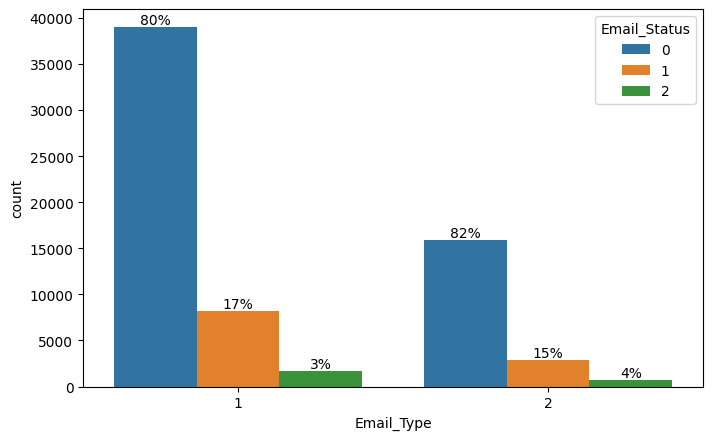

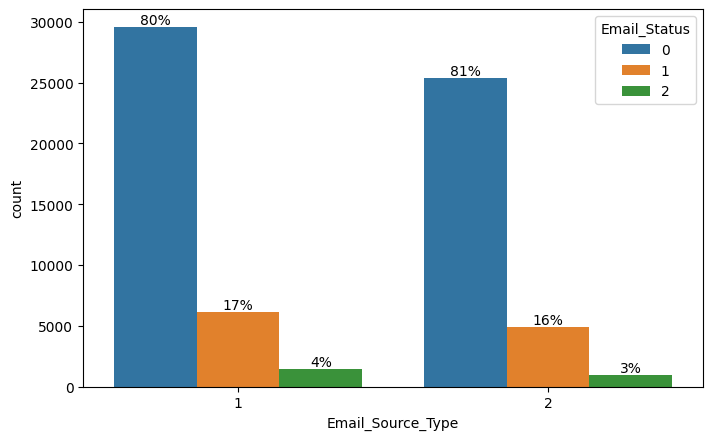

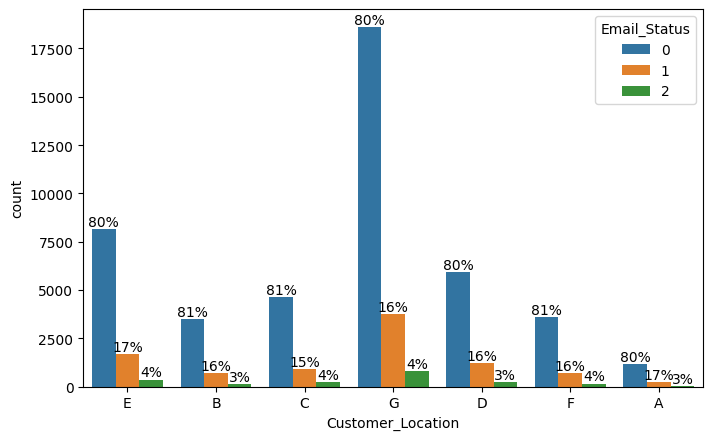

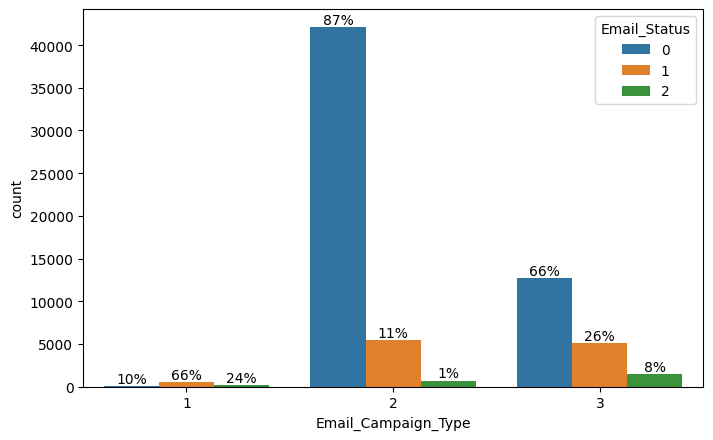

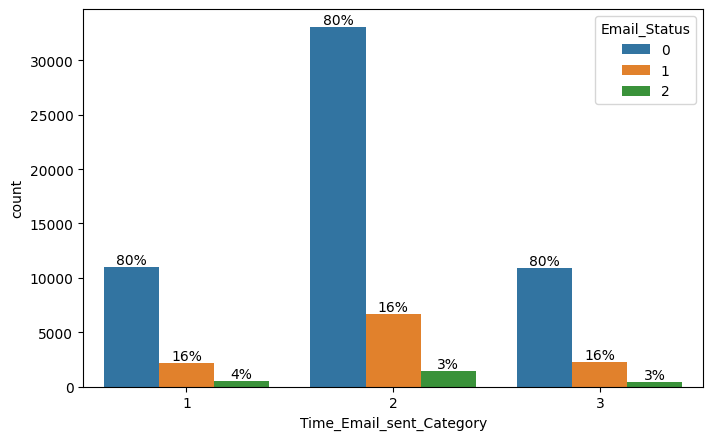

In [31]:
#starting with categorical variables
categorical_variables = ['Email_Type','Email_Source_Type','Customer_Location','Email_Campaign_Type','Time_Email_sent_Category']
Target_var = ['Email_Status']

for i,value in enumerate(categorical_variables):
  ax = sns.countplot(x=email_df[value], hue=email_df[Target_var[0]])
  unique = len([x for x in email_df[value].unique() if x==x])
  bars = ax.patches
  for i in range(unique):
      catbars=bars[i:][::unique]
      #get height
      total = sum([x.get_height() for x in catbars])
      #print percentage
      for bar in catbars:
        ax.text(bar.get_x()+bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")
  plt.show()


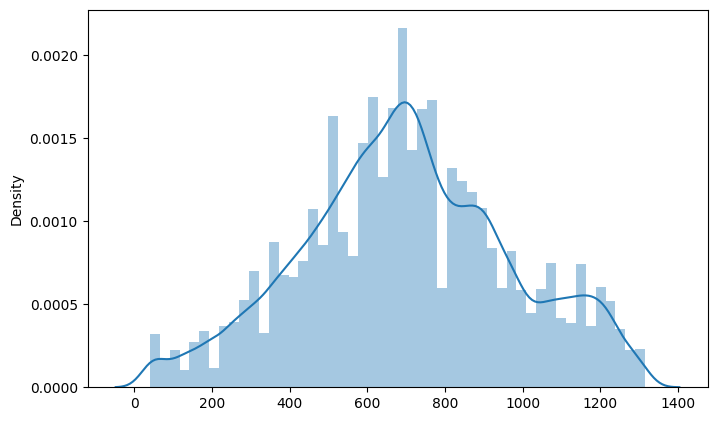

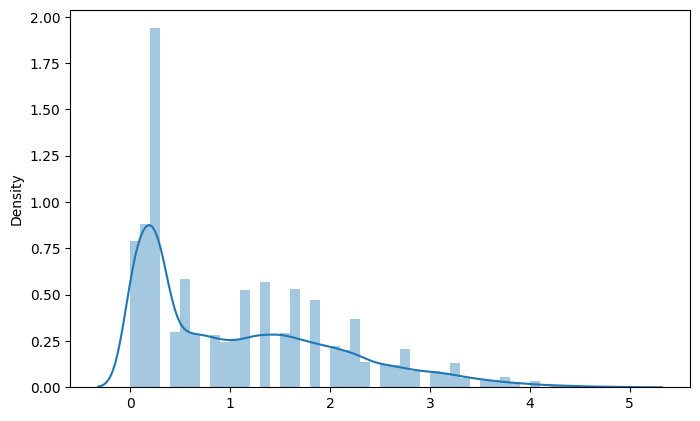

In [32]:
#continuous variables
#distribution of other continuous features and understanding where the data tends to
cont_var = ['Word_Count','Subject_Hotness_Score']
for i, value in enumerate(cont_var):
 sns.distplot(x=email_df[value], hist = True)
 plt.show()

In [34]:
#Correlation:
#dropping columns
columns_to_drop = ['Email_ID','Customer_Location']
df = email_df.drop(columns_to_drop,axis=1)
     

<AxesSubplot:>

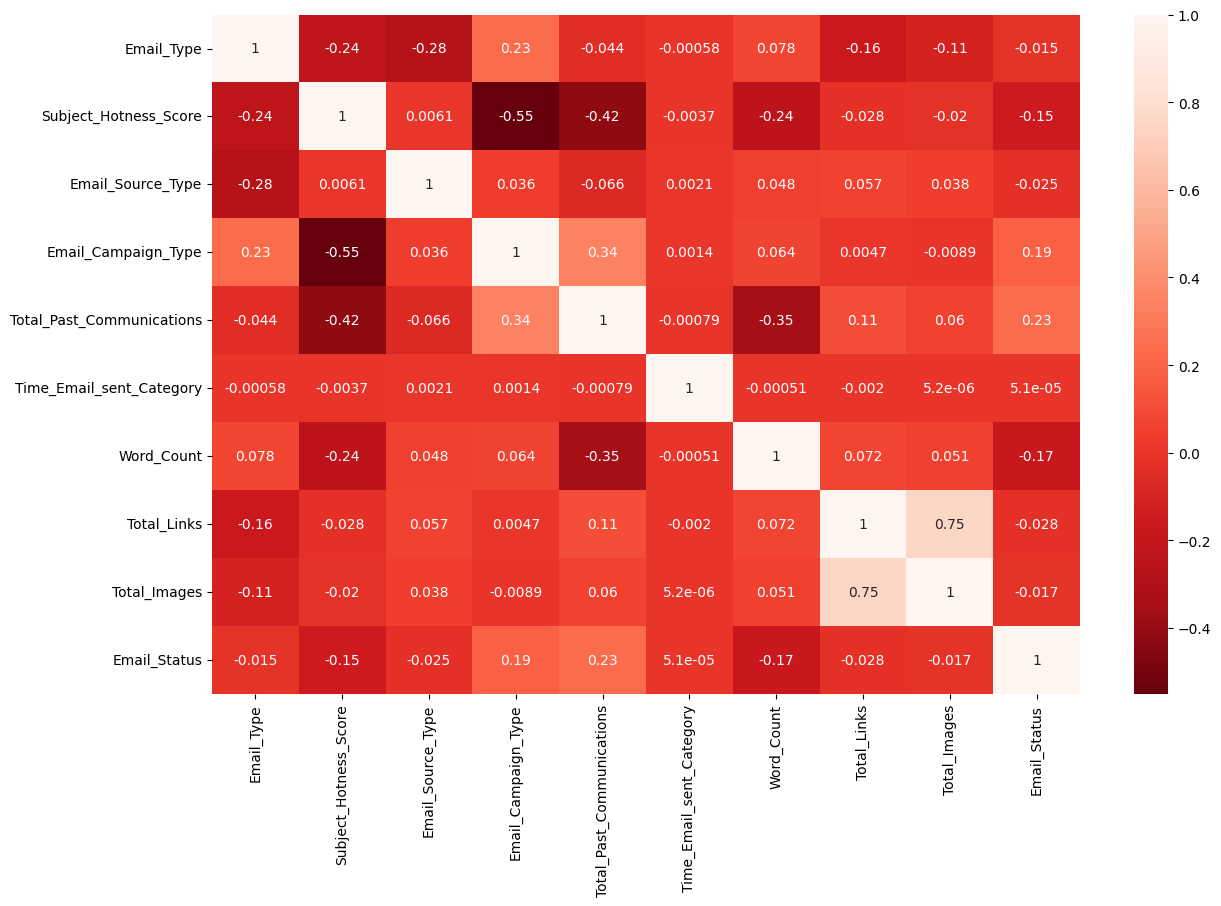

In [42]:
#correlation matrix
plt.figure(figsize=(14,9))
sns.heatmap(df.corr(), cmap='Reds_r', annot=True)
     

Observation: Correlation matrix justifies our earlier hypotheses. Email Campaign Type and Total past communication shows positive correlation with emails being read and acknowledged. Word Count and Subject Hotness score are the most negatives amongst other. We can see multicollinearity involved in Email Campaign Type, Total past communication and Total links, Total Images among others and we will have to deal with it.

In [43]:
#VIF code
def vif_calc(df):
  vif = pd.DataFrame()
  vif["variables"] = df.columns
  vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
  return(vif)

In [44]:
#let's get VIF scores
vif_df = vif_calc(df[[i for i in df.describe().columns if i not in categorical_variables + ['Email_Status']]])
vif_df

,variables,VIF
0,Subject_Hotness_Score,1.805701
1,Total_Past_Communications,3.939214
2,Word_Count,4.065844
3,Total_Links,8.690857
4,Total_Images,3.171439


In [45]:
#we can try combining them up
df['Total_Img_links'] = df['Total_Images'] + df['Total_Links']
df.drop(['Total_Images','Total_Links'],inplace=True,axis=1)
     

In [46]:
#let's check VIF scores
vif_df = vif_calc(df[[i for i in df.describe().columns if i not in categorical_variables + ['Email_Status']]])
vif_df

,variables,VIF
0,Subject_Hotness_Score,1.734531
1,Total_Past_Communications,3.430879
2,Word_Count,3.687067
3,Total_Img_links,2.629047


total images vif is large and its positivly correalted with total images.so we cam merge them.

<AxesSubplot:xlabel='Email_Status', ylabel='count'>

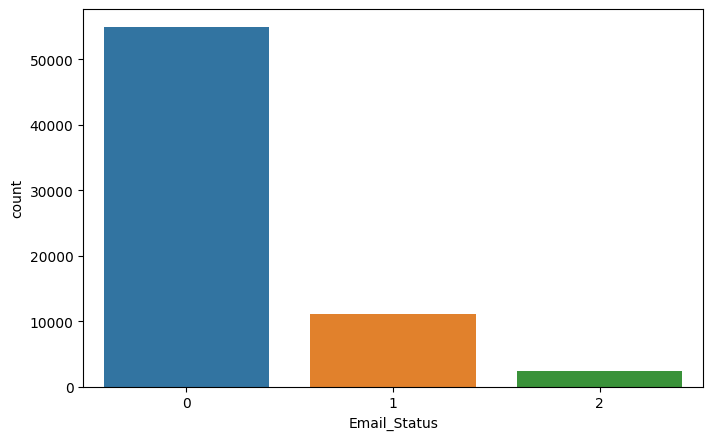

In [26]:
# check the dependent varaible
sns.countplot(email_df['Email_Status'])

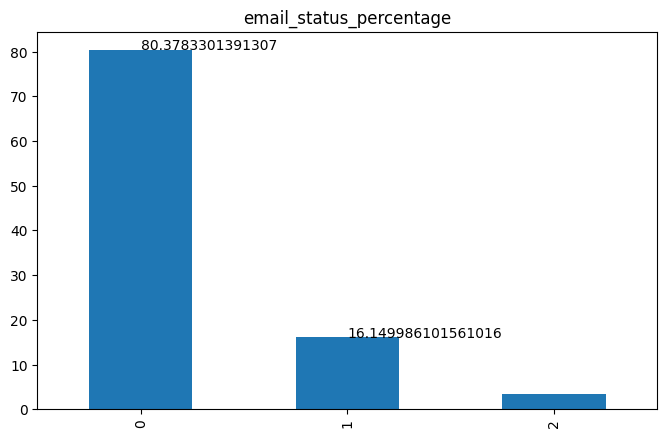

In [28]:
ax=email_df['Email_Status'].value_counts(normalize=True)*100
ax.plot.bar()
plt.title("email_status_percentage")
for x,y in zip([0,1],ax):
  plt.text(x,y,y)
plt.show()

dependent variable is highly unbalanced


In [20]:
#email_df._get_numeric_data().columns

Index(['Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status'],
      dtype='object')

In [21]:
#email_df.corr()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
Email_Type,1.000000,-0.235480,-0.275201,0.233565,-0.044495,-0.000581,0.077938,-0.159863,-0.106728,-0.015074
Subject_Hotness_Score,-0.235480,1.000000,0.006142,-0.550676,-0.419320,-0.003665,-0.237531,-0.027908,-0.019666,-0.146531
Email_Source_Type,-0.275201,0.006142,1.000000,0.035797,-0.066282,0.002137,0.048318,0.056755,0.038311,-0.024527
Email_Campaign_Type,0.233565,-0.550676,0.035797,1.000000,0.341066,0.001388,0.063540,0.004730,-0.008907,0.185510
Total_Past_Communications,-0.044495,-0.419320,-0.066282,0.341066,1.000000,-0.000790,-0.345251,0.106800,0.059849,0.233169
Time_Email_sent_Category,-0.000581,-0.003665,0.002137,0.001388,-0.000790,1.000000,-0.000508,-0.002002,0.000005,0.000051
Word_Count,0.077938,-0.237531,0.048318,0.063540,-0.345251,-0.000508,1.000000,0.072357,0.050802,-0.171116
Total_Links,-0.159863,-0.027908,0.056755,0.004730,0.106800,-0.002002,0.072357,1.000000,0.752937,-0.027849
Total_Images,-0.106728,-0.019666,0.038311,-0.008907,0.059849,0.000005,0.050802,0.752937,1.000000,-0.017392
Email_Status,-0.015074,-0.146531,-0.024527,0.185510,0.233169,0.000051,-0.171116,-0.027849,-0.017392,1.000000
